In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('credit_card_clustering.csv')

In [3]:
## Data Shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


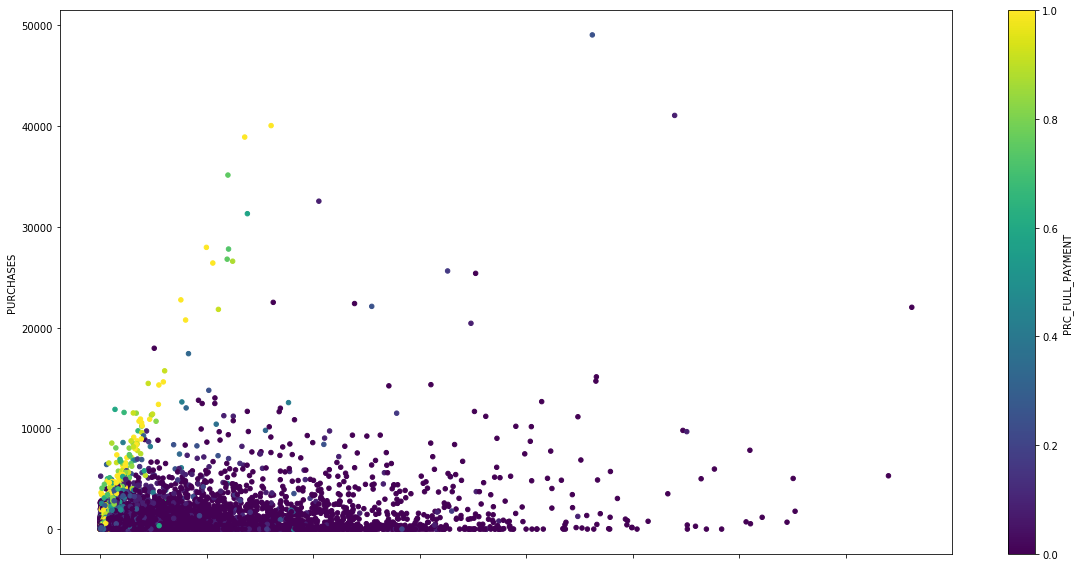

In [5]:
## Initial Plot
data.plot.scatter(x='BALANCE', 
                      y='PURCHASES', 
                      c='PRC_FULL_PAYMENT', 
                      cmap='viridis',
                      figsize=(20, 10))

In [6]:
from sklearn.cluster import KMeans

features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
X = data[features].fillna(0)

X.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.947277,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.922543,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## KMeans Clustering

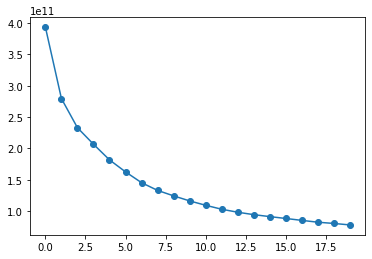

In [7]:
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

#choose 6

C:\Users\mox.ballo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\mox.ballo\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\mox.ballo\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


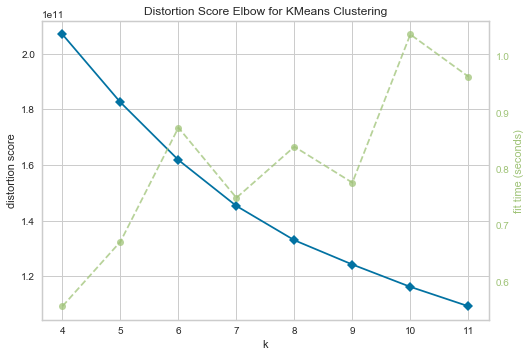

In [8]:
from yellowbrick.cluster import KElbowVisualizer
# wala lang, try lang.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

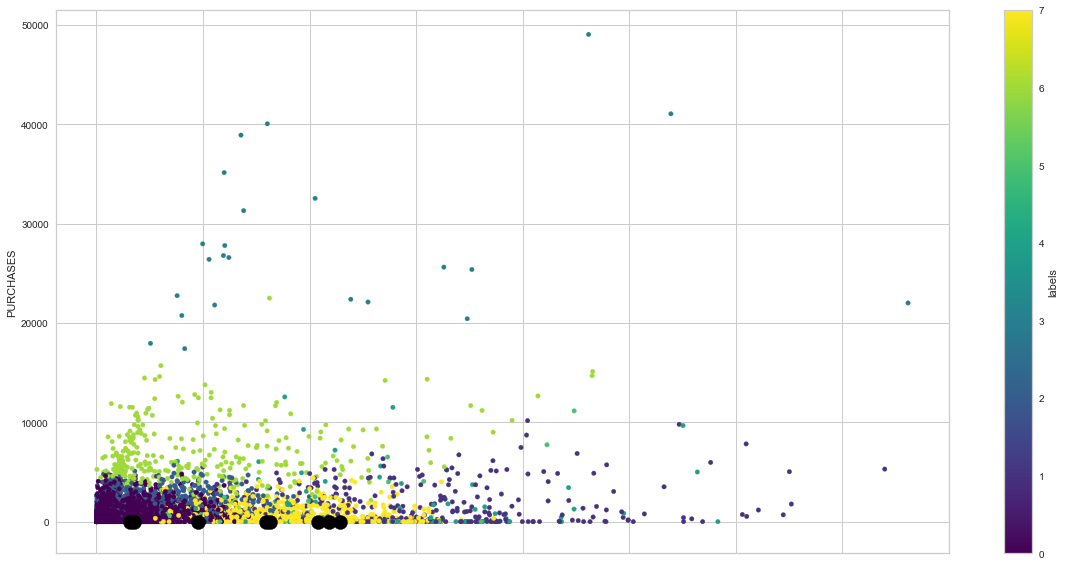

In [9]:
# Clustering using KMeans. We choose 6 clusters
km = KMeans(n_clusters = 8, random_state = 42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
clustered_data = X.copy()

# Add labels to new_data dataframe
clustered_data['labels'] = labels

clustered_data.plot.scatter(x='BALANCE', 
                      y='PURCHASES', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

In [10]:
# # Cluster 0
# ## 
# cluster_0 = clustered_data[clustered_data['labels']==0]
# cluster_0.describe()

In [11]:
# # Cluster 1
# ## 
# cluster_1 = clustered_data[clustered_data['labels']==1]
# cluster_1.describe()

In [12]:
Kmeans_mean = clustered_data.groupby(by='labels').mean()
Kmeans_mean = Kmeans_mean[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
Kmeans_data = Kmeans_mean

Kmeans_count = clustered_data.set_index(["BALANCE", "labels"]).count(level="labels")
# Kmeans_data['count'] = Kmeans_count['labels']
Kmeans_data['count']= Kmeans_count['BALANCE_FREQUENCY']
Kmeans_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,count
labels,,,,,,,,,,,,,,,,,,
0,780.762653,0.850189,501.604801,243.200523,258.706245,438.209223,0.452279,0.130116,0.347946,0.107040,2.178087,9.406184,2126.841106,857.853667,487.196212,0.144398,11.366673,5239
1,5716.602467,0.945104,1597.691523,977.660221,620.179095,2150.457334,0.556574,0.329974,0.398284,0.221251,5.534216,22.953642,13482.229581,2591.515116,1826.972483,0.110320,11.863135,453
2,887.231890,0.871830,1200.450739,697.404888,503.269413,226.387212,0.620473,0.331791,0.430516,0.049376,0.922535,18.980634,7032.973218,1418.518637,334.120479,0.236937,11.810446,1704
3,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043,23
4,5189.420647,0.877764,1438.895789,861.477281,577.611491,10889.470338,0.349221,0.192579,0.271455,0.498482,20.877193,18.157895,10832.894737,15494.836889,2077.186306,0.145335,11.684211,114
5,4066.731264,0.988430,1043.494727,119.814727,923.680000,920.037169,0.470799,0.038430,0.441598,0.103030,3.018182,18.836364,4266.363636,1584.596245,22960.015462,0.001515,11.909091,55
6,2372.035714,0.970617,6571.706677,4443.451543,2130.035549,535.922009,0.912439,0.703795,0.703279,0.070789,1.937685,73.816024,8024.777448,6523.103252,1149.024018,0.319344,11.925816,337
7,3970.947572,0.956278,491.005980,273.695902,217.343951,3522.221889,0.308020,0.131386,0.210991,0.367933,10.094634,8.489756,6286.557280,2669.134832,1513.169185,0.028690,11.464390,1025


## Agglomerative Clustering

In [13]:
from sklearn.cluster import  AgglomerativeClustering

# Clustering using AGC
agc = AgglomerativeClustering()

# Fit data to model
agc.fit(X)

# Get labels
agglabels = agc.labels_

# Create new dataframe with features and labels
#new_data = X.copy()

# Add labels to dataframe
clustered_data['agg_labels'] = agglabels

In [14]:
agg_mean = clustered_data.groupby(by='agg_labels').mean()
agg_mean = agg_mean[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
agg_data = agg_mean

agg_count = clustered_data.set_index(["BALANCE", "agg_labels"]).count(level="agg_labels")
agg_data['agg_count']= agg_count['BALANCE_FREQUENCY']
agg_data


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,agg_count
agg_labels,,,,,,,,,,,,,,,,,,
0,2453.519311,0.899502,1658.516600,1032.164358,626.740889,1539.186803,0.556826,0.297293,0.403321,0.157443,4.215530,21.912643,7506.655279,2731.326530,923.738052,0.175583,11.738925,4018
1,840.188385,0.859160,469.335677,234.200746,235.363043,522.393326,0.436195,0.125197,0.332759,0.116977,2.461273,8.841849,2039.555398,919.944744,760.862208,0.135899,11.336780,4932


## DB SCAN

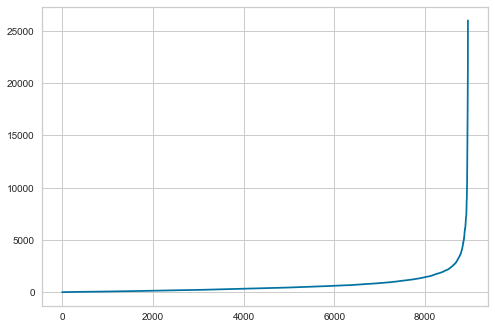

In [15]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [16]:
from sklearn.cluster import DBSCAN

# Use DBSCAN and vary eps and min_samples
dbs = DBSCAN(eps=2000, min_samples=10)

# Fit data to model
dbs.fit(X)

# Get labels
dblabels = dbs.labels_

# Create new dataframe with features and labels
#new_data = X.copy()

# Add labels to new_data dataframe
clustered_data['db_labels'] = dblabels


In [17]:
db_mean = clustered_data.groupby(by='db_labels').mean()
db_mean = db_mean[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
db_data = db_mean

db_count = clustered_data.set_index(["BALANCE", "db_labels"]).count(level="db_labels")
db_data['db_count']= db_count['BALANCE_FREQUENCY']
db_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,db_count
db_labels,,,,,,,,,,,,,,,,,,
-1,4341.924948,0.939791,3714.502011,2424.700233,1290.530825,3265.414104,0.620752,0.383029,0.482262,0.236718,7.423280,39.868783,9716.777297,6824.203447,3210.061451,0.156302,11.783069,945
0,1233.218955,0.869760,679.664430,372.854532,307.059702,709.451031,0.474494,0.180520,0.350493,0.123183,2.756659,11.713768,3871.423482,1131.512099,552.903577,0.153563,11.485432,7997
1,4609.831232,1.000000,4150.301250,3656.882500,493.418750,200.029403,0.937500,0.802083,0.385417,0.093750,2.125000,37.750000,9837.500000,1757.870159,1134.240794,0.000000,12.000000,8


## GMM

In [18]:
from sklearn.mixture import GaussianMixture

# Use DBSCAN and vary eps and min_samples
gm = GaussianMixture(n_components=8)

# choose 8 parang sa elbow

# Fit data to model
gm.fit(X)

# Get labels
gmlabels = gm.predict(X)

# Create new dataframe with features and labels
#clustered_data = X.copy()

# Add labels to new_data dataframe
clustered_data['gm_labels'] = gmlabels

In [19]:
gm_mean = clustered_data.groupby(by='gm_labels').mean()
gm_mean = gm_mean[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
gm_data = gm_mean

gm_count = clustered_data.set_index(["BALANCE", "gm_labels"]).count(level="gm_labels")
gm_data['gm_count']= gm_count['PURCHASES']
gm_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,gm_count
gm_labels,,,,,,,,,,,,,,,,,,
0,2122.811005,0.880447,0.000000,0.000000,0.000000,1968.895850,0.000000,0.000000,0.000000,0.272870,6.140562,0.000000,4014.516399,1611.481152,708.565541,0.044359,11.305723,1992
1,138.600088,0.601235,631.873449,328.018231,303.855218,0.000000,0.513968,0.133441,0.382351,0.000000,0.000000,8.680992,3718.471520,814.487431,125.928935,0.302406,11.116253,1815
2,4288.709464,0.953525,11065.488469,6977.649898,4114.722551,457.355283,0.811451,0.476546,0.668125,0.063930,1.214286,97.397959,9897.959184,9991.003437,3062.964149,0.244065,11.897959,98
3,4616.298318,0.914325,2678.570455,1291.155909,1387.887273,6583.198030,0.583638,0.213597,0.514627,0.370232,20.763636,35.427273,8083.181818,10847.950031,10236.508448,0.107215,11.527273,110
4,1713.504150,0.848278,349.997955,273.947035,76.050920,2284.847688,0.343523,0.155038,0.176588,0.287440,7.222904,4.560327,4043.465328,2102.102509,655.393459,0.046660,10.390593,489
5,1337.913776,0.906485,2002.199826,1366.910193,635.289632,1553.568824,0.760147,0.400626,0.546375,0.238270,5.348162,27.081238,4868.338706,3122.268397,625.514553,0.220260,11.063830,517
6,3190.100211,1.000000,892.313751,519.969643,372.344108,1632.040790,0.562832,0.249114,0.404708,0.269742,6.184510,16.090357,5209.529233,1566.977133,1790.120253,0.000000,12.000000,1317
7,1096.017517,1.000000,1558.694031,901.865180,656.828851,0.000000,0.769461,0.340193,0.591054,0.000000,0.000000,24.897779,4693.950995,1510.348285,534.638253,0.216735,12.000000,2612


In [20]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Clusters.xlsx', engine='xlsxwriter')

clustered_data.to_excel(writer, sheet_name='Clustered Data')
Kmeans_data.to_excel(writer, sheet_name='Kmeans')
agg_data.to_excel(writer, sheet_name='Agglomerate')
db_data.to_excel(writer, sheet_name='DB Scan')
gm_data.to_excel(writer, sheet_name='GMM')

writer.save()